<a href="https://colab.research.google.com/github/cmreyesvalencia-png/colab-git-assignment2-CR/blob/main/Lesson_6_ml_basic_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 6: House Price Prediction Using California Housing Data**
- **Course:** Data Analytics and Business Intelligence
Analyst
-  **Institution:** Willis College
-  **Student Name:**  Carlos Reyes
- **Date:** 2025 November, 3

## **Assignment Simple machine Learning Project cycle**

### **_House Price Prediction Using California Housing Data_**
This dataset provides information about house prices in California. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "California Housing Dataset" from sklearn.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (California Housing):
* MedInc: Median income in block group
* HouseAge: Median house age in block group
* AveRooms: Average number of rooms per household
* AveBedrms: Average number of bedrooms per household
* Population: Block group population
* AveOccup: Average number of household members
* Latitude: Block group latitude
* Longitude: Block group longitude
* MedHouseVal (Target): Median house value in block group




In [2]:

# --- 1. Imports ---
# TODO: Import all the necessary libraries for data handling, visualization, and model building.
# Example: import pandas as pd
# Add your imports here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# --- 2.Data Collection and Loading ---
# TODO: Load the 'California Housing' dataset from sklearn and convert it into a pandas DataFrame.

def load_california_housing_dataset():
    """
    Load California Housing dataset with multiple fallback options for Google Colab
    """
    try:
        # Method 1 (Primary): Load from sklearn dataset
        print("Attempting to load from sklearn...")
        from sklearn.datasets import fetch_california_housing
        california_housing = fetch_california_housing()
        df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
        df['MedHouseVal'] = california_housing.target
        print("Dataset loaded successfully from sklearn!")
        return df

    except Exception as e:
        print(f"Error loading from sklearn: {e}")

        # Method 2 (Secondary): Check if file already exists in Colab session
        try:
            print("Attempting to load from existing file in Colab session...")
            if os.path.exists('california_housing_dataset.csv'):
                df = pd.read_csv('california_housing_dataset.csv')
                print("Dataset loaded from existing file in Colab session!")
                return df
            else:
                raise Exception("File not found in Colab session")
        except Exception as e2:
            print(f"Error loading from Colab session: {e2}")

            # Method 3 (Tertiary): Upload file interactively
            try:
                print("Attempting interactive file upload...")
                from google.colab import files
                print("Please upload the california_housing_dataset.csv file...")
                uploaded = files.upload()

                if uploaded:
                    # Get the first uploaded file
                    file_name = list(uploaded.keys())[0]
                    df = pd.read_csv(file_name)
                    print(f"Dataset loaded successfully from uploaded file: {file_name}")
                    return df
                else:
                    raise Exception("No file uploaded")
            except Exception as e3:
                print(f"All loading methods failed: {e3}")
                raise Exception("Unable to load California Housing dataset. Please ensure sklearn is installed or the CSV file is available.")

# Load the dataset
try:
    df = load_california_housing_dataset()
    print(f"Dataset shape: {df.shape}")
    print(f"Column names: {df.columns.tolist()}")
    print("\nFirst few rows of the dataset:")
    print(df.head())
except Exception as e:
    print(f"Fatal error: {e}")
    print("Please ensure sklearn is installed or upload the california_housing_dataset.csv file.")
    # Exit early if dataset cannot be loaded
    raise

# Create CSV file of the dataset
df.to_csv('california_housing_dataset.csv', index=False)
print("Dataset saved as 'california_housing_dataset.csv'")
print(f"Dataset shape: {df.shape}")

Attempting to load from sklearn...
Dataset loaded successfully from sklearn!
Dataset shape: (20640, 9)
Column names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

First few rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Dataset saved as 'california_housing_dataset.csv'
Dataset shape: (20640, 9)


In [4]:
# --- 3.Quick Check of Data ---
# TODO: Display the first few rows of the dataset to understand its structure.
# Hint: Use `.head()` to inspect the first few rows.

# Add your code here:
print("\nFirst 5 rows of the dataset:")
print(df.head())

# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
# Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.

# Add your code here:
print("\nDataset info:")
print(df.info())

print("\nDataset description:")
print(df.describe())

# Check data types
print("\nData types:")
print(df.dtypes)

# All features are continuous (float64), no categorical variables in this dataset
print("\nAll features are continuous numerical variables")



First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedr


Missing values check:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


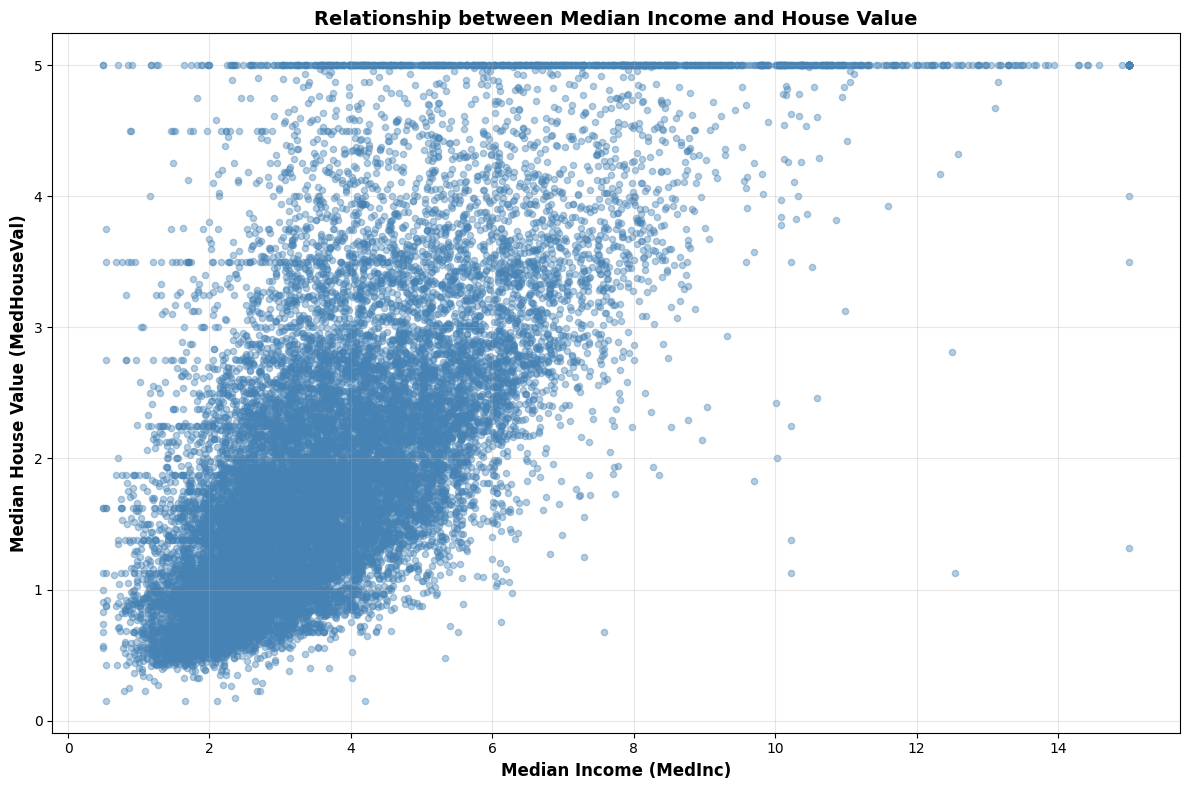

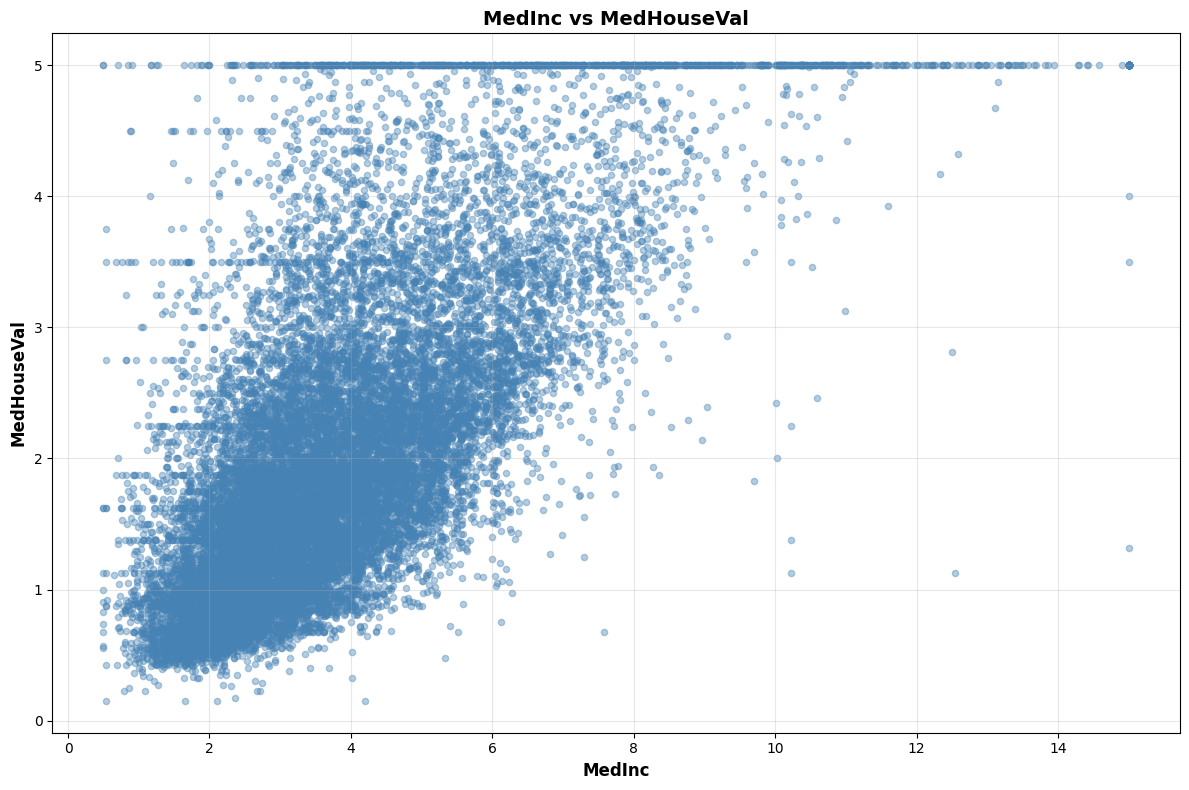

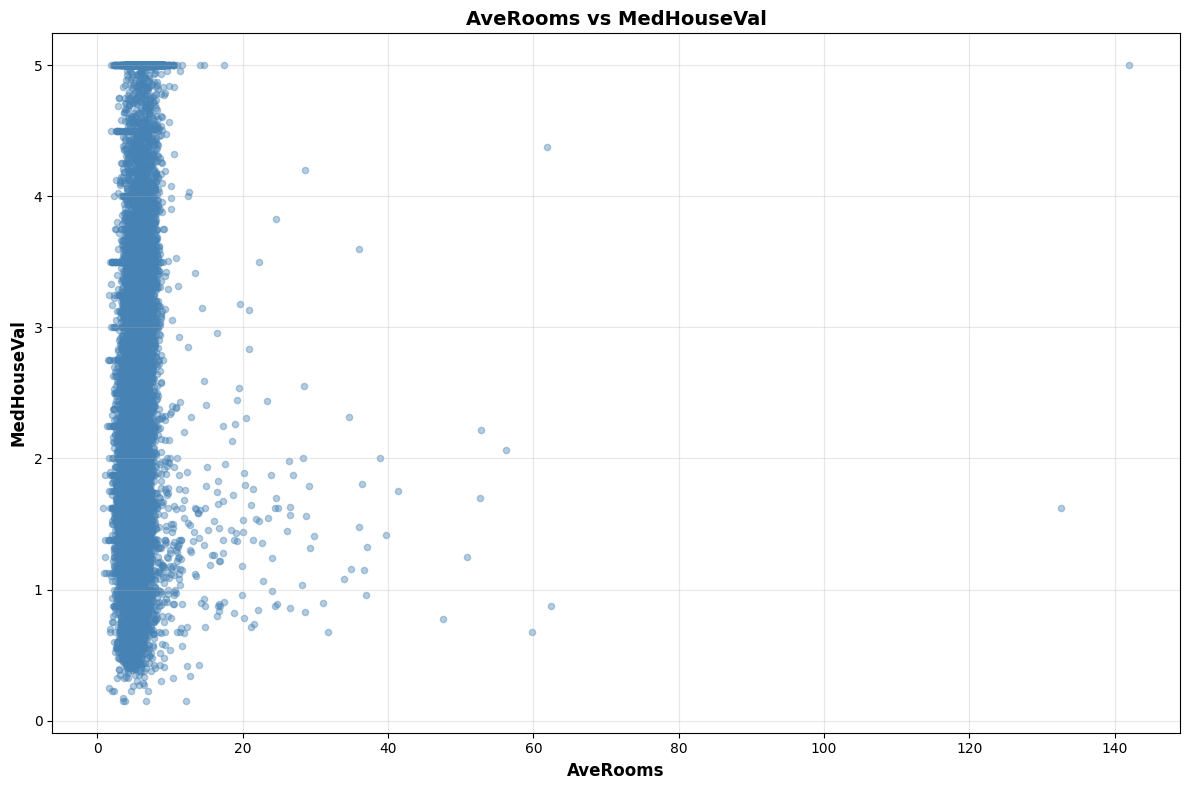

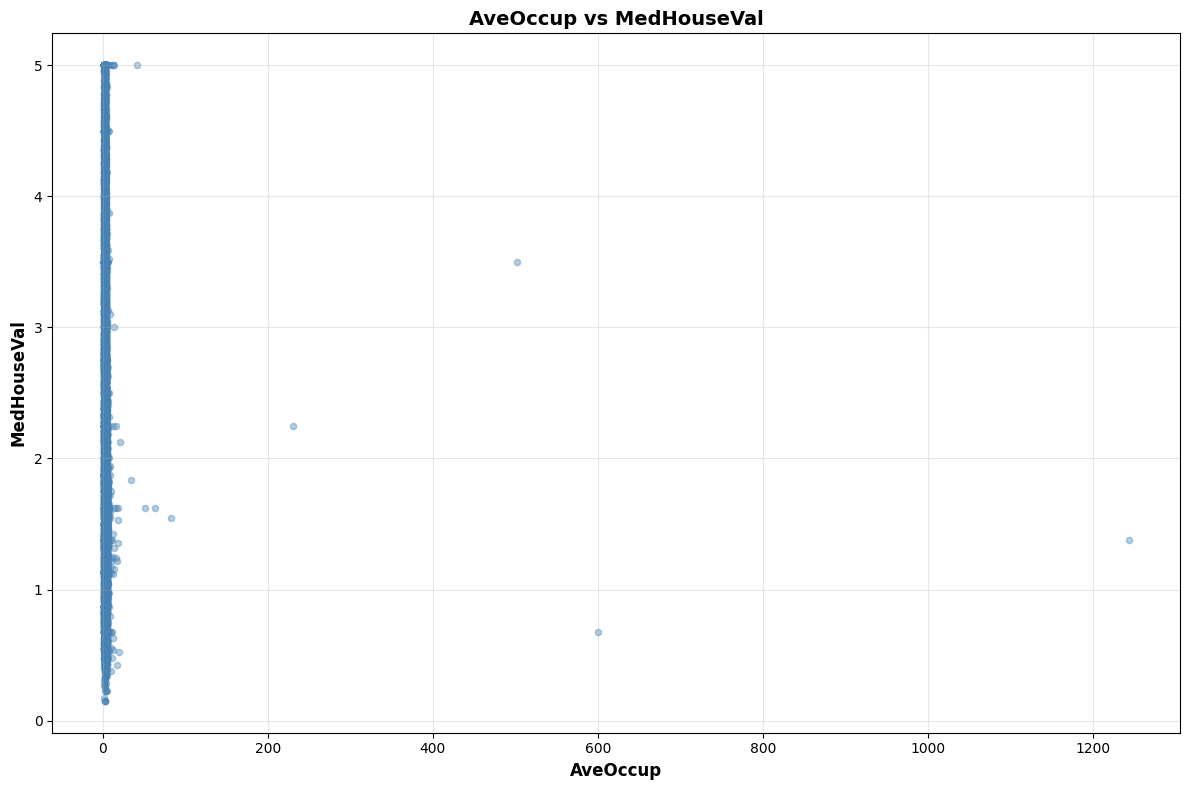

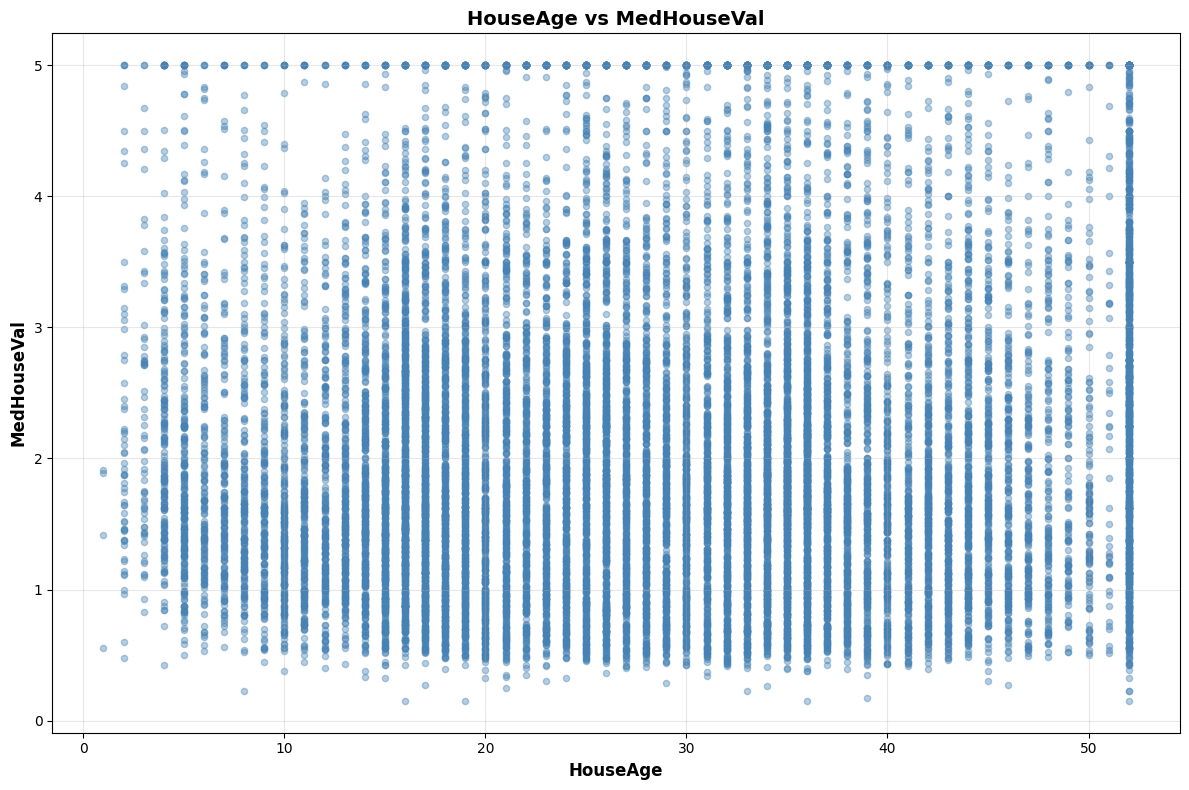

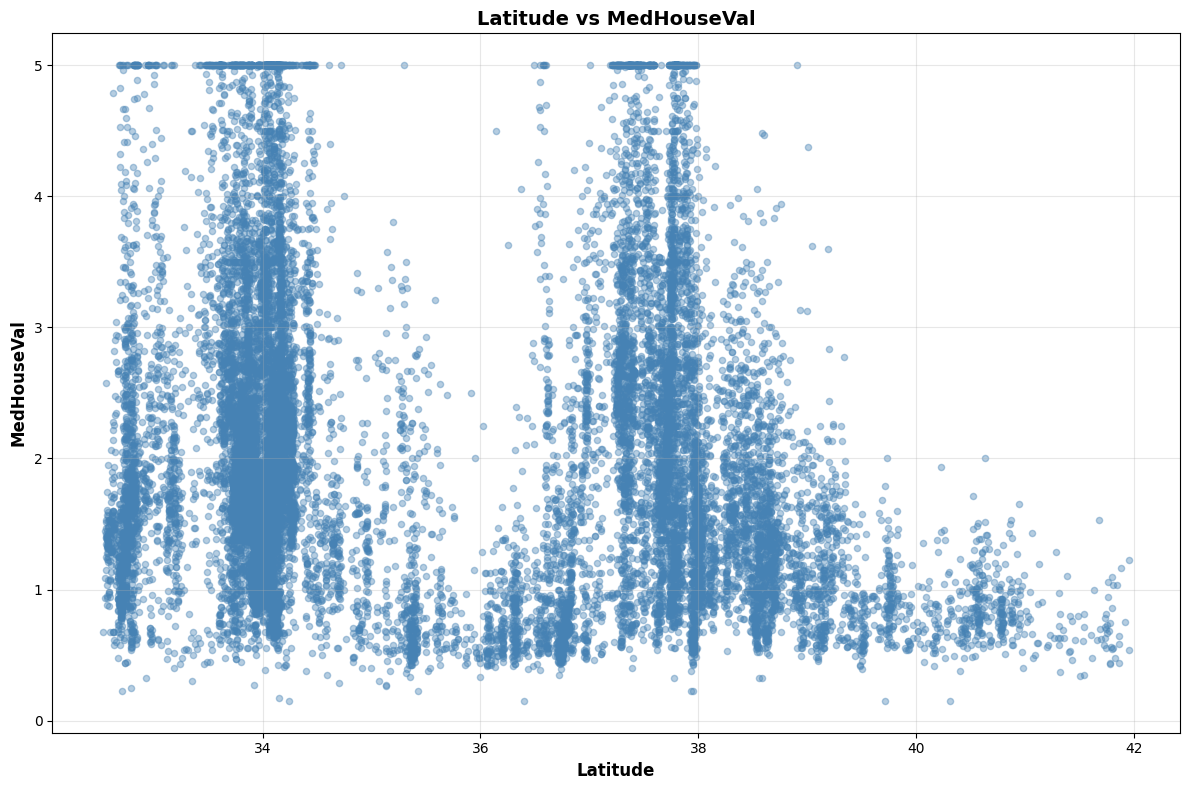

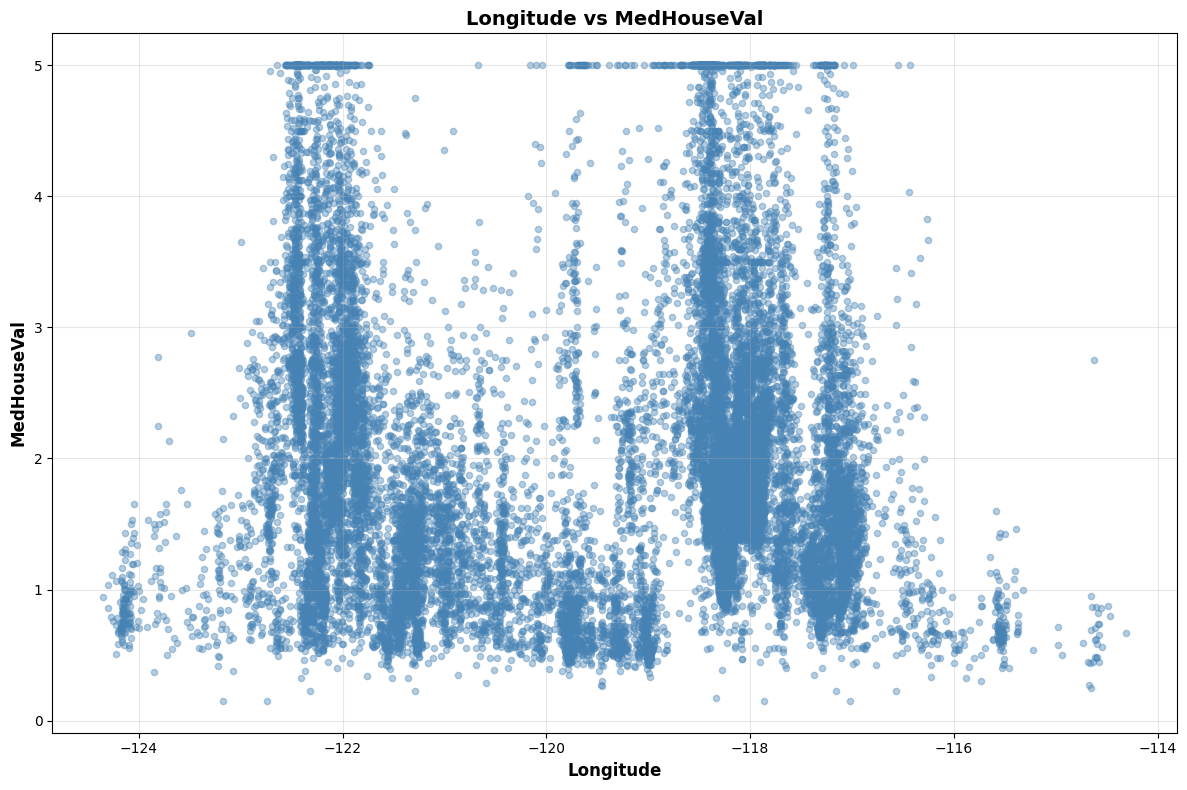

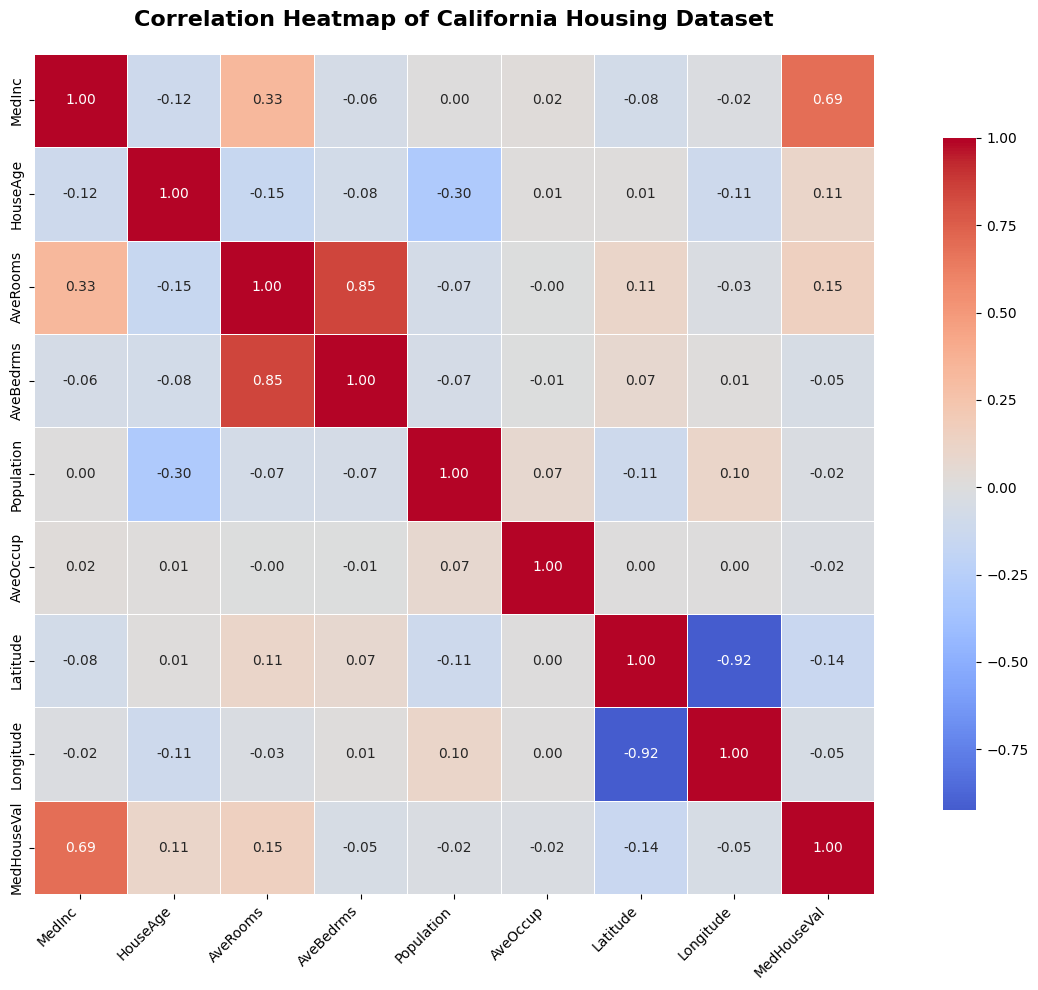

In [5]:
# --- 4.EDA and Data Preprocessing ---

# 4.1 TODO: Check for missing/null values.
# Hint: Use `.isnull().sum()` to check for null values.

# Add your code here:
print("\nMissing values check:")
print(df.isnull().sum())

# 4.2 TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal).
# Example: Use `plt.scatter()` to visualize the relationship between 'MedInc' and 'MedHouseVal'.

# Add your code here:
plt.figure(figsize=(12, 8))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.4, s=20, color='steelblue')
plt.xlabel('Median Income (MedInc)', fontsize=12, fontweight='bold')
plt.ylabel('Median House Value (MedHouseVal)', fontsize=12, fontweight='bold')
plt.title('Relationship between Median Income and House Value', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4.3 TODO: Create a function to automate scatter plots for all features vs MedHouseVal.
# Hint: The function should loop over a list of features and plot scatter plots for each.

# Define your function here:
def plot_features_vs_target(df, features, target='MedHouseVal'):
    """
    Create individual scatter plots for multiple features against the target variable
    """
    for feature in features:
        plt.figure(figsize=(12, 8))
        plt.scatter(df[feature], df[target], alpha=0.4, s=20, color='steelblue')
        plt.xlabel(feature, fontsize=12, fontweight='bold')
        plt.ylabel(target, fontsize=12, fontweight='bold')
        plt.title(f'{feature} vs {target}', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# 4.4 TODO: Use the function to visualize the relationships between multiple features and the target variable.
# Features: ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
# Target: 'MedHouseVal'

# Add your code here:
features_to_plot = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'Latitude', 'Longitude']
plot_features_vs_target(df, features_to_plot)

# Additional visualization: Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', annot_kws={'size': 10},
            cbar_kws={'shrink': 0.8}, linewidths=0.5)
plt.title('Correlation Heatmap of California Housing Dataset', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [6]:
# --- 5.ML Model Training(Without Scaling)---

# 5.1 TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.

# Define X (features) and y (target) and perform the train-test split:
# Add your code here:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# 5.2 TODO: Choose an appropriate regression model.
# Hint: Use `LinearRegression()` from `sklearn.linear_model`.

# Define your regression model here:
model_original = LinearRegression()

# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

# Add your code here:
model_original.fit(X_train, y_train)
print("Model training completed!")

# Display model coefficients
print("\nModel coefficients:")
for feature, coef in zip(X.columns, model_original.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model_original.intercept_:.4f}")

# Make predictions
y_pred_original = model_original.predict(X_test)


Training set size: (16512, 8)
Testing set size: (4128, 8)
Model training completed!

Model coefficients:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337
Intercept: -37.0233


# **Analisys**
The model exhibits a large negative intercept (-37.02), which is unrealistic for house prices, along with extreme coefficient values. To resolve this, we'll implement the model using a pipeline with feature scaling


In [7]:
# --- 5.ML Model Training- (With Pipeline & Scaling) ---

# 5.1 TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.

# Define X (features) and y (target) and perform the train-test split:
# Add your code here:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# 5.2 TODO: Choose an appropriate regression model.
# Hint: Use `LinearRegression()` from `sklearn.linear_model`.

# Define your regression model here with pipeline:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_reg', LinearRegression())
])

# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

# Add your code here:
model_pipeline.fit(X_train, y_train)
print("Model training completed!")

# Display model coefficients (extract from pipeline)
print("\nModel coefficients:")
linear_model = model_pipeline.named_steps['linear_reg']
for feature, coef in zip(X.columns, linear_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {linear_model.intercept_:.4f}")

# Make predictions
y_pred_pipeline = model_pipeline.predict(X_test)

Training set size: (16512, 8)
Testing set size: (4128, 8)
Model training completed!

Model coefficients:
MedInc: 0.8544
HouseAge: 0.1225
AveRooms: -0.2944
AveBedrms: 0.3393
Population: -0.0023
AveOccup: -0.0408
Latitude: -0.8969
Longitude: -0.8698
Intercept: 2.0719


In [8]:
# --- Comparative Analysis ---
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Calculate metrics for both models
mse_original = mean_squared_error(y_test, y_pred_original)
mse_pipeline = mean_squared_error(y_test, y_pred_pipeline)

r2_original = r2_score(y_test, y_pred_original)
r2_pipeline = r2_score(y_test, y_pred_pipeline)

mae_original = mean_absolute_error(y_test, y_pred_original)
mae_pipeline = mean_absolute_error(y_test, y_pred_pipeline)

# Create comparison table
comparison_data = {
    'Aspect': [
        'Intercept', 'MedInc Coefficient', 'HouseAge Coefficient', 'AveRooms Coefficient',
        'AveBedrms Coefficient', 'Population Coefficient', 'AveOccup Coefficient',
        'Latitude Coefficient', 'Longitude Coefficient', 'Mean Squared Error (MSE)',
        'R-squared (R²)', 'Mean Absolute Error (MAE)', 'Feature Scaling'
    ],

    'Original Model': [
        f"{model_original.intercept_:.4f}",
        f"{model_original.coef_[0]:.4f}", f"{model_original.coef_[1]:.4f}",
        f"{model_original.coef_[2]:.4f}", f"{model_original.coef_[3]:.4f}",
        f"{model_original.coef_[4]:.4f}", f"{model_original.coef_[5]:.4f}",
        f"{model_original.coef_[6]:.4f}", f"{model_original.coef_[7]:.4f}",
        f"{mse_original:.4f}", f"{r2_original:.4f}", f"{mae_original:.4f}",
        "No"
    ],

    'Pipeline Model (Scaled)': [
        f"{linear_model.intercept_:.4f}",
        f"{linear_model.coef_[0]:.4f}", f"{linear_model.coef_[1]:.4f}",
        f"{linear_model.coef_[2]:.4f}", f"{linear_model.coef_[3]:.4f}",
        f"{linear_model.coef_[4]:.4f}", f"{linear_model.coef_[5]:.4f}",
        f"{linear_model.coef_[6]:.4f}", f"{linear_model.coef_[7]:.4f}",
        f"{mse_pipeline:.4f}", f"{r2_pipeline:.4f}", f"{mae_pipeline:.4f}",
        "Yes"
    ]
}

# Create and display comparison table
import pandas as pd
comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("MODEL COMPARISON: ORIGINAL vs PIPELINE WITH SCALING")
print("="*80)
print(comparison_df.to_string(index=False))


MODEL COMPARISON: ORIGINAL vs PIPELINE WITH SCALING
                   Aspect Original Model Pipeline Model (Scaled)
                Intercept       -37.0233                  2.0719
       MedInc Coefficient         0.4487                  0.8544
     HouseAge Coefficient         0.0097                  0.1225
     AveRooms Coefficient        -0.1233                 -0.2944
    AveBedrms Coefficient         0.7831                  0.3393
   Population Coefficient        -0.0000                 -0.0023
     AveOccup Coefficient        -0.0035                 -0.0408
     Latitude Coefficient        -0.4198                 -0.8969
    Longitude Coefficient        -0.4337                 -0.8698
 Mean Squared Error (MSE)         0.5559                  0.5559
           R-squared (R²)         0.5758                  0.5758
Mean Absolute Error (MAE)         0.5332                  0.5332
          Feature Scaling             No                     Yes


# **Evaluation and comparison of the model**

- INTERCEPT: Original model has negative intercept (-37), which is unrealistic for house prices.
- COEFFICIENT SCALES: Pipeline model coefficients are on comparable scales, allowing proper feature importance analysis.
- INTERPRETABILITY: With scaling, we can actually compare which features have stronger effects.
- PERFORMANCE: Both models should have similar predictive performance, but pipeline is more robust.




Model Evaluation Results:
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R-squared (R2) Score: 0.5758


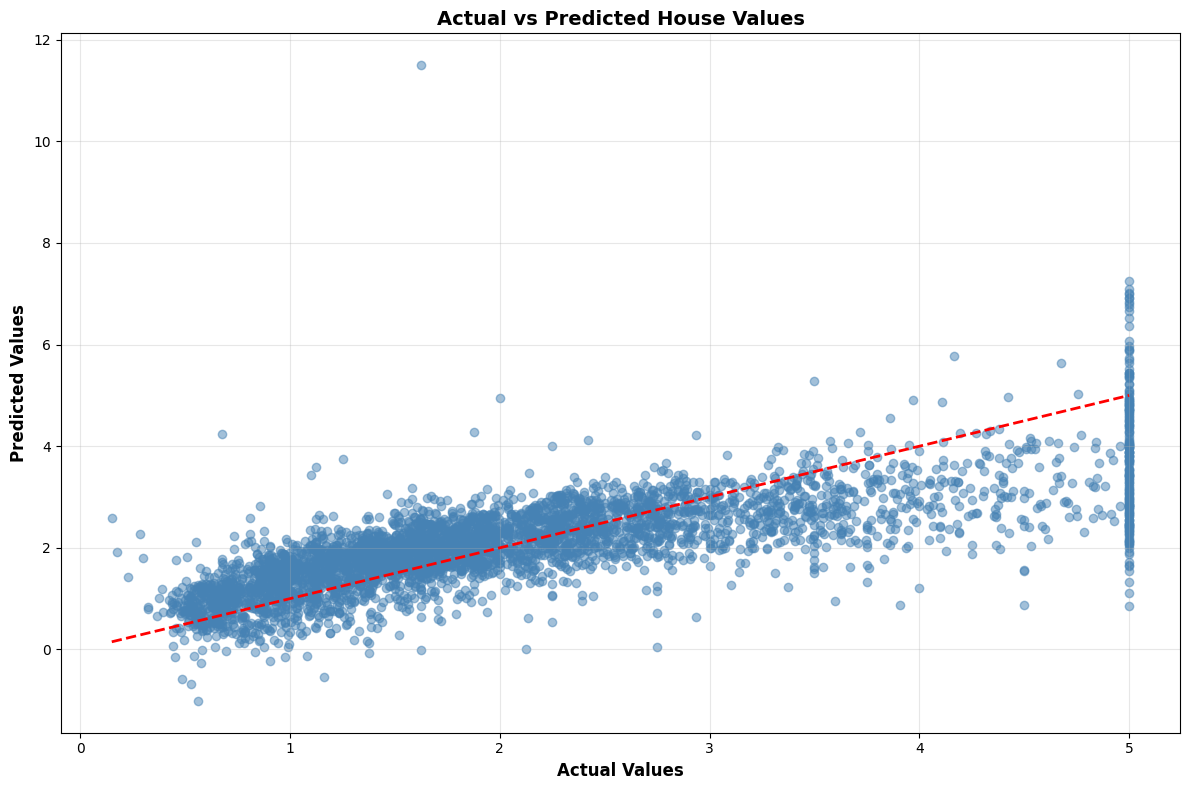

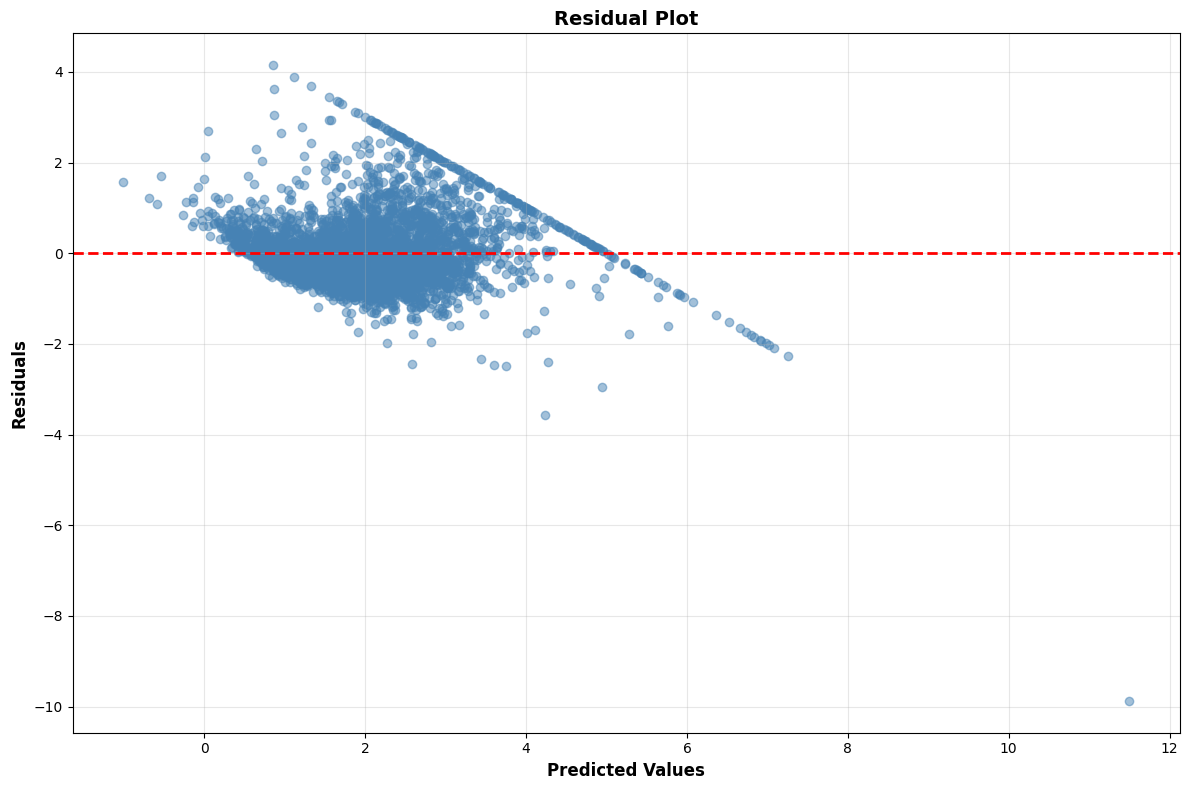

In [16]:
# --- 6.Model Evaluation ---
# TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.

# Predict on the test set and calculate the evaluation metrics:
# Add your code here:
y_pred = model_pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=12, fontweight='bold')
plt.title('Actual vs Predicted House Values', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, residuals, alpha=0.5, color='steelblue')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values', fontsize=12, fontweight='bold')
plt.ylabel('Residuals', fontsize=12, fontweight='bold')
plt.title('Residual Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
# --- 7.Model Prediction ---
# TODO: Predict Median House Value from a new set of feature inputs.
# Example new data: 'MedInc' = 3, 'HouseAge' = 30, 'AveRooms' = 6, 'AveOccup' = 3, 'Latitude' = 34, 'Longitude' = -118, 'AveBedrms' = 1, 'Population' = 1500
# Hint: Use `.predict()` on a new data array.

# Add your prediction code here:

# Dataset Features (California Housing):
# MedInc: Median income in block group
# HouseAge: Median house age in block group
# AveRooms: Average number of rooms per household
# AveBedrms: Average number of bedrooms per household
# Population: Block group population
# AveOccup: Average number of household members
# Latitude: Block group latitude
# Longitude: Block group longitude
# MedHouseVal (Target): Median house value in block group

# New data examples based on actual dataset ranges - CORRECTED ORDER
new_data_examples = [
    [3.0, 25.0, 5.0, 1.0, 1500.0, 3.0, 34.0, -118.0],    # Moderate values
    [8.0, 15.0, 6.0, 1.0, 500.0, 2.0, 37.8, -122.4],     # High income, Bay Area
    [1.5, 45.0, 4.0, 1.2, 2000.0, 4.0, 32.7, -117.2]     # Low income, Southern CA
]

print("\nModel Predictions on New Data:")
for i, data in enumerate(new_data_examples, 1):
    # Ensure the column order matches the training data
    new_data_df = pd.DataFrame([data], columns=X.columns)

    # Make prediction using pipeline model
    predicted_value = model_pipeline.predict(new_data_df)

    print(f"\nExample {i}:")
    print(f"Input features: MedInc={data[0]}, HouseAge={data[1]}, AveRooms={data[2]}, AveBedrms={data[3]}, Population={data[4]}, AveOccup={data[5]}, Latitude={data[6]}, Longitude={data[7]}")
    print(f"Predicted Median House Value: ${predicted_value[0] * 100000:,.2f}")


Model Predictions on New Data:

Example 1:
Input features: MedInc=3.0, HouseAge=25.0, AveRooms=5.0, AveBedrms=1.0, Population=1500.0, AveOccup=3.0, Latitude=34.0, Longitude=-118.0
Predicted Median House Value: $162,336.54

Example 2:
Input features: MedInc=8.0, HouseAge=15.0, AveRooms=6.0, AveBedrms=1.0, Population=500.0, AveOccup=2.0, Latitude=37.8, Longitude=-122.4
Predicted Median House Value: $396,483.40

Example 3:
Input features: MedInc=1.5, HouseAge=45.0, AveRooms=4.0, AveBedrms=1.2, Population=2000.0, AveOccup=4.0, Latitude=32.7, Longitude=-117.2
Predicted Median House Value: $161,901.32
